In [1]:
# install the package for google colab 
!pip install pylca 

In [2]:
import time 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylca.LCA import LCA

sns.set(style='white', palette='colorblind', context='talk')
np.random.seed(0)
%matplotlib inline 

In [3]:
n_units = 3
# input weights
w_input = 1
# decision param
leak = .1
competition = 1
self_excit = 0
# time step size
dt = .2
offset = 0


# set up the input
T = 15
input_pattern_set = list(np.eye(n_units))
stimuli = np.vstack(
    [np.tile(input_pattern, (T, 1)) for input_pattern in input_pattern_set]
)

# init LCA
lca = LCA(
    n_units, dt, leak, competition,
    self_excit=self_excit, w_input=w_input, offset=offset
)

# run LCA
time_begin = time.time()
vals = lca.run(stimuli)
time_end = time.time()
run_time = time_end - time_begin
print(run_time)

0.0034868717193603516


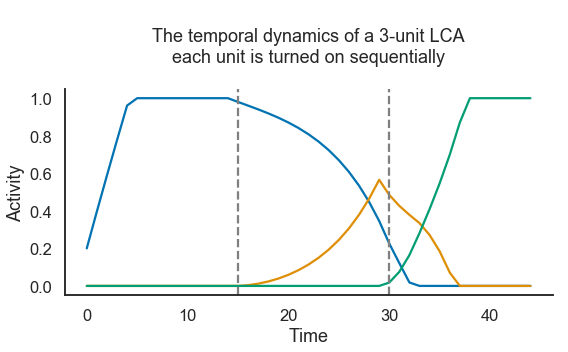

In [4]:
# calc event boundaries
vals_len, _ = np.shape(vals)
bounds = [(k+1)*T for k in np.arange(n_units-1)]

# plot
f, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(vals)
for b in bounds:
    ax.axvline(b, linestyle='--', color='grey')

title_text = f"""
The temporal dynamics of a {n_units}-unit LCA
each unit is turned on sequentially
"""
ax.set_title(title_text)
ax.set_xlabel('Time')
ax.set_ylabel('Activity')
f.tight_layout()
sns.despine()